## Exploratory Analysis
The objectives of exploratory data analysis include, but not limited to:

identifying data outliers,
identifying trends in time and space,
detecting patterns of interest,
generating hypotheses,
opening opportunities for new ways to collect data, and
enabling hypothesis testing through experiments.

To begin this exploratory analysis, first use matplotlib to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

## Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.


In [3]:
import pandas as pd 
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sb

# data loading
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')



## Looking at the shape of the dataset: 60,0000 rows(registers) x 785 columns (atttributes)

In [2]:
print(data.shape)

(60000, 785)


In [3]:
print(test.shape)

(10000, 785)


In [4]:
#verify how first registers look like
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Box plot

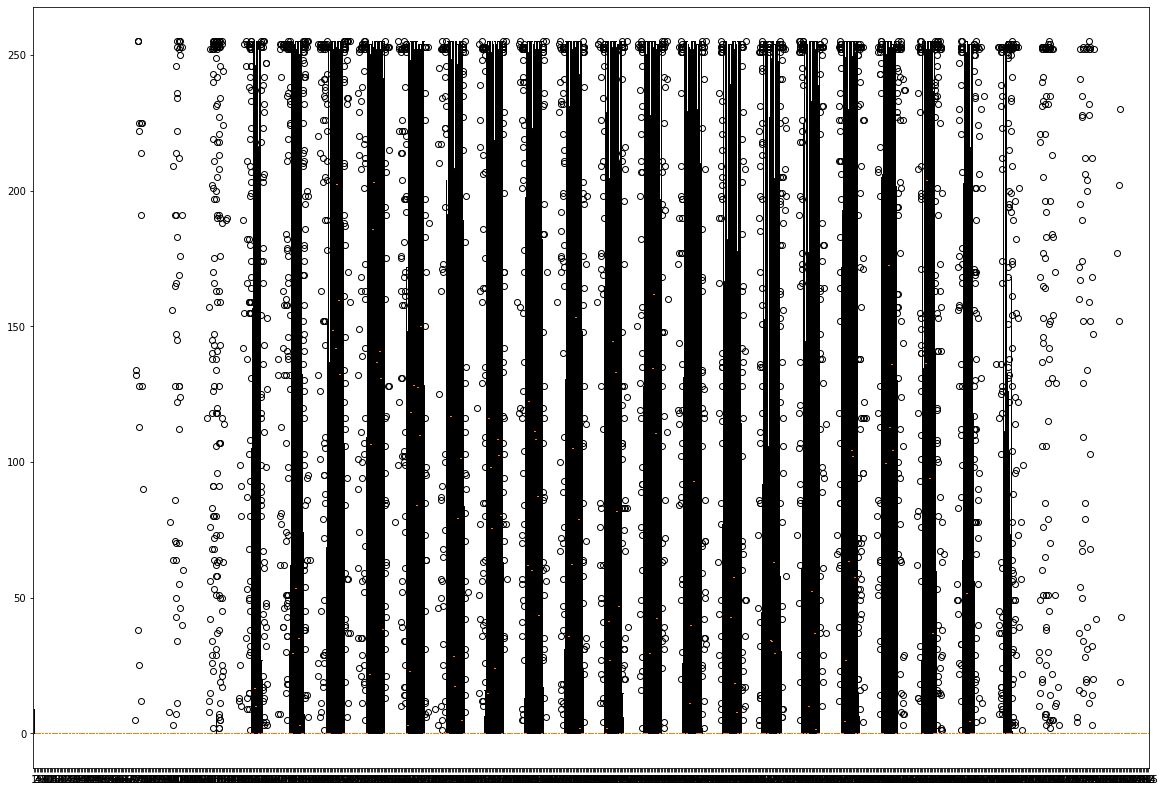

In [5]:
fig= mp.figure(figsize= (20,14))
mp.boxplot(data[:100])
mp.show()

## Check for outliers in the dataset

In [6]:
def find_outliers_IQR(df):
    q1= df.quantile(0.25)
    q3= df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(data["10x9"])

print("number of outliers: "+ str(len(outliers)))

print( "max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 10431
max outlier value: 255
min outlier value: 188


## Outlier plot

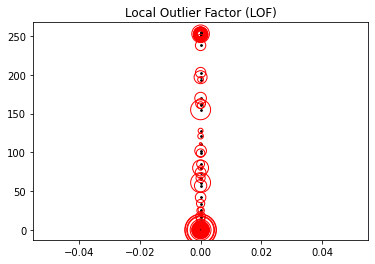

In [4]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(data)


X_scores = clf.negative_outlier_factor_[:200]

mp.title("Local Outlier Factor (LOF)")
mp.scatter(data["4x7"][:200], data["10x9"][:200], color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
mp.scatter(
    data["4x7"][:200],
   data["10x9"][:200],
    s=1000 * radius,
    edgecolors ="r",
    facecolors="none",
    label="Outlier scores",
)
mp.axis("tight")


mp.show()

## Correlation Matrices

In [7]:
print(data.corr())

          label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...     28x19  \
label  1.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  0.031072   
1x1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1x2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1x3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
1x4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
28x24  0.005085  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ... -0.000191   
28x25       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
28x26       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
28x27       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   
28x28       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN   

          28x20     28x21     28x22     28x23     2

## Heat map

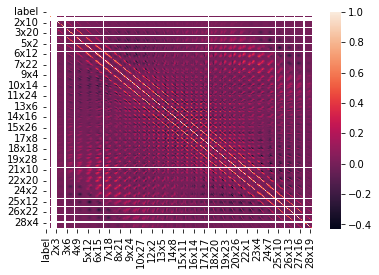

In [5]:
heatmap = sb.heatmap(data.corr())
mp.show()

## Data processing  

In [8]:
y_train= data['label']
x_train= data.drop('label', axis=1)

# splitting the training data into 20% validation data 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

def parse_test_df(test):
    imgs = test.iloc[:, 0:].values
    imgs_2d = np.array([[[[float(imgs[index][i * 28 + j]) / 255] for j in range(28)] for i in range(28)] for index in
                        range(len(imgs))])
    return imgs_2d

x_test = parse_test_df(test)

## Training data insights

<AxesSubplot:>

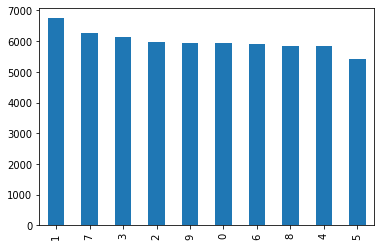

In [15]:
data['label'].value_counts().plot.bar()

## The biggest class is 1 with about 6500 samples in our training data. The smallest one is 5 with about 5500 samples.

In [14]:
#validation data analysis
x_val.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.0,12000.0,12000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108583,0.072750,0.064833,0.019583,0.021167,0.004833,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.540522,4.016483,3.253052,1.396613,2.318692,0.529465,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,199.000000,128.000000,254.000000,58.000000,0.0,0.0,0.0,0.0


## input values analysis


In [16]:
x_train.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.0,48000.0,48000.0,48000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223396,0.092896,0.040833,0.019208,0.013604,0.001292,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.362635,3.941003,2.726794,1.751829,1.475397,0.282990,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,244.000000,62.000000,0.0,0.0,0.0,0.0


In [14]:
# input vlaues analysis


x_train.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,48000.0,...,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.0,48000.0,48000.0,48000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223396,0.092896,0.040833,0.019208,0.013604,0.001292,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.362635,3.941003,2.726794,1.751829,1.475397,0.282990,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,244.000000,62.000000,0.0,0.0,0.0,0.0


## Data cleaning

<AxesSubplot:>

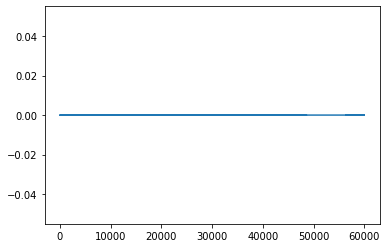

In [20]:
# some features have fixed values for all their registers
# Such attributes are constant and don't contribute with relevant information
# for example  pixel1(1x3)
x_train['1x3'].plot()

## Remove fixed features from our input dataset

In [47]:
#but we must store the removed features for reference later

dropped_columns = []

for column in x_train.columns:
    if x_train[column].max() == x_train[column].min():
        dropped_columns.append(column)
        
x_train.drop(dropped_columns, axis = 1, inplace = True) 

print('The number of dropped columns:', len(dropped_columns))
print('New shape of training dataset:', x_train.shape)

The number of dropped columns: 71
New shape of training dataset: (48000, 713)


In [23]:
# we have to comfrim that we don't have null values as input

for column in x_train.columns:
    if x_train[column].isnull().any():
        print('Null value detected in the feature:', column)

In [48]:
x_train.isnull().any().describe()

count       713
unique        1
top       False
freq        713
dtype: object

## Defining training parameters

In [44]:

epochs= 5
batch_size=100
validation_size=0.1



## Model

In [ ]:
# we are going to build our model with inputs 713 and 10 outputs
Features =713
labels= 10
# used a neuron network with 2 layers as a solution model. each layer have 128 neurons
# Adam algorithm to adjust coefficients(the neurons' connections weight 
#  Cross Entropy to get the loss and
#  Accuracy as our model's performance metrics.

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(labels))
model.add(tf.keras.layers.Dense(labels, input_shape= (Features,)))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))


#starting the model's training 
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
training_history = model.fit(x_train, y_train,batch_size= batch_size, epochs=epochs, validation_data=(x_val, y_val), validation_split= validation_size)

Epoch 1/5
432/432 [==============================] - 2s 5ms/step - loss: 1.6828 - accuracy: 0.8033 - val_loss: 0.4184 - val_accuracy: 0.8990
Epoch 2/5
432/432 [==============================] - 2s 4ms/step - loss: 0.3075 - accuracy: 0.9172 - val_loss: 0.2946 - val_accuracy: 0.9219
Epoch 3/5
432/432 [==============================] - 2s 4ms/step - loss: 0.2081 - accuracy: 0.9412 - val_loss: 0.2673 - val_accuracy: 0.9319
Epoch 4/5
432/432 [==============================] - 2s 4ms/step - loss: 0.1574 - accuracy: 0.9541 - val_loss: 0.2267 - val_accuracy: 0.9504
Epoch 5/5
431/432 [============================>.] - ETA: 0s - loss: 0.1294 - accuracy: 0.9619

## Evaluate on validation set

In [46]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(val_loss, val_acc)

375/375 [==============================] - 1s 2ms/step - loss: 0.2111 - accuracy: 0.9487
0.21105529367923737 0.9486666917800903


In [34]:
model.save('digits_reader.model')

2022-12-10 08:48:00.156927: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [35]:
new_model= tf.keras.models.load_model('digits_reader.model')

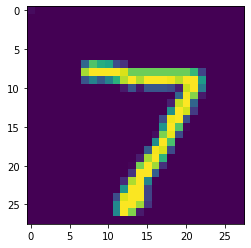

In [33]:
mp.imshow(x_test[0])
mp.show()